In [1]:
# Import libraries

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, assemble
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit_ibm_provider import IBMProvider, least_busy
from qiskit import Aer
from qiskit.quantum_info import Statevector, partial_trace, random_unitary
from numpy.random import randint, rand
from IPython.display import clear_output
from qiskit.extensions import Initialize
from statistics import mean, stdev, variance
from qiskit_aer.noise import NoiseModel, device
from qiskit_aer import QasmSimulator
import matplotlib.pyplot as plt
import numpy as np
from math import pi, sqrt
import time
from random import choice, sample
import random


IBMProvider.save_account(
    "bdde1c124342f5707b2cb22a03b9facf9d5ec281af7160895d0c1bc976438f056becb5a303f7adbf320d11f09e5e7512d7885c1a09c5df9f34804f09e7a49527",
    overwrite=True,
)
provider = IBMProvider()
shots = 1024
sim = provider.get_backend("ibmq_qasm_simulator")
backend = provider.get_backend("ibmq_lima")
# state_vector_sim = Aer.get_backend("statevector_simulator")

In [2]:
eligible_devices = provider.backends(filters=lambda x:x.configuration().n_qubits>1 and not x.configuration().simulator)

for backend in eligible_devices:
    print(backend.name)

            
chosen_backend = least_busy(eligible_devices)
print(chosen_backend.name)

ibm_lagos
ibm_perth
ibmq_jakarta
ibmq_quito
ibmq_lima
ibmq_manila
ibm_nairobi
ibmq_belem
ibmq_belem


In [3]:
#function to create pure entangled states

def pure_estate(circuit,q0,q1):
    u1 = random_unitary(2)
    circuit.append(u1,[q0])
    circuit.cx(q0,q1)
    
    return circuit       

In [4]:
###### Generating a random message

n=int(input("Length of message:"))
message = np.random.randint(2, size = n)
print(message)
nd=int(input("Number of decoy bits to be inserted:"))

Length of message: 15


[1 0 1 0 1 0 1 0 0 1 1 0 0 0 1]


Number of decoy bits to be inserted: 10


In [5]:
#Generating a list of possible states

states=['0', '1', '+', '-']

In [6]:
#Generating set of decoy photons

dq_st=[]
def gen_decoy(i):
    dqu=QuantumCircuit(1)
    if i=='1' or i=='-':
        dqu.x(0)
    if i=='+' or i=='-':
        dqu.h(0)
    return dqu
    #dqu.save_statevetor()
    #dq.append(dqu)
    #result = state_vector_sim.run(dqu).result()
    #sv = result.get_statevector()
    #dq_st.append(sv)

In [7]:
#Step1:Creating n pure entangled states
def create_pest(m):
    pk=[]
    for i in range(m):
        qr = QuantumRegister(2, 'qb')
        cr = ClassicalRegister(1, 'cb')
        circuit = QuantumCircuit(qr,cr)
        state=(pure_estate(circuit,qr[0],qr[1]))
        pk.append(state)
        #display(pk[i].draw('mpl'))
    return pk

private_key0=create_pest(n)
#check eavesdropping by adding decoy photons at random position and printing the positions

def create_pkd(private_key,n,nd):
    pkd=[]
    for i in range(n):
        pkd.append(private_key[i].copy())
    lst=[x for x in range(n+nd)]
    pos1=sample(lst,nd)
    pos1.sort()
    rdq1=[]
    rdq_st1=[]
    for i in pos1:
        decoy_st1=choice(states)
        decoy1=gen_decoy(decoy_st1)
        rdq1.append(decoy1)
        rdq_st1.append(decoy_st1)
        decoy12=decoy1.copy()
        pkd.insert(i,decoy12)
    print(pos1)
    return pkd,rdq_st1,pos1

pkd0,rdq_st10,pos10=create_pkd(private_key0,n,nd)

[0, 1, 3, 5, 13, 14, 15, 16, 21, 22]


In [8]:
#for i in range(nd):
    #result = state_vector_sim.run(rdq1[i]).result()
    #sv = result.get_statevector()
    #print(sv)
for i in range(nd):
    print(rdq_st10[i])

0
-
+
0
-
-
0
0
0
0


In [9]:
def noisy_meas_err_func(cc,rdq_st,j,shots,flag):
    err=0
    err_c=0
    a=list(cc.keys())
    a.sort()
    if '0' in cc and '1' not in cc:
        if flag==0:
            if a[0] != '0':
                err=shots
                err_c+=1
        else:
            if rdq_st[j]=='-':
                err=shots
                err_c+=1
    elif '1' in cc and '0' not in cc:
        if flag==0:
            if a[0] != '1':
                err=shots
                err_c+=1
        else:
            if rdq_st[j]=='+':
                err=shots
                err_c+=1  
    if '0' in cc and '1' in cc:
        if flag == 0:
            if a[0] == rdq_st[j]:
                err=cc['1']
                if cc['1']>cc['0'] or abs(cc['0']-cc['1'])<600:
                    err_c += 1
            elif a[1] == rdq_st[j]:
                err = cc['0']
                if cc['0']>cc['1'] or abs(cc['0']-cc['1'])<600:
                    err_c += 1
        elif flag==1:
            if rdq_st[j]=='+':
                err=cc['1']
                if abs(cc['0']-cc['1'])<600:
                    err_c += 1
            elif rdq_st[j]=='-':
                err=cc['0']
                if abs(cc['0']-cc['1'])<600:
                    err_c += 1
    
    return err,err_c

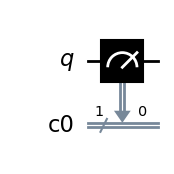

The measurements of the decoy photon at position 0 after the attack is: {'0': 1021, '1': 3}


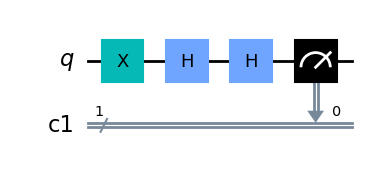

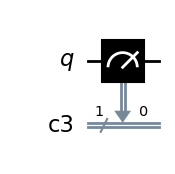

The measurements of the decoy photon at position 5 after the attack is: {'0': 1021, '1': 3}


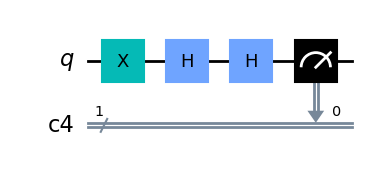

The measurements of the decoy photon at position 13 after the attack is: {'0': 43, '1': 981}


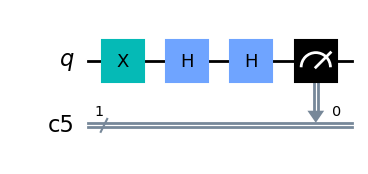

The measurements of the decoy photon at position 14 after the attack is: {'0': 40, '1': 984}


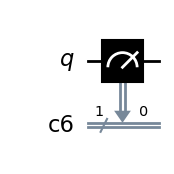

The measurements of the decoy photon at position 15 after the attack is: {'0': 1022, '1': 2}


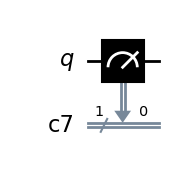

The measurements of the decoy photon at position 16 after the attack is: {'0': 1022, '1': 2}


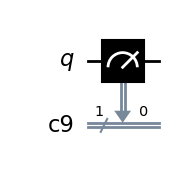

The measurements of the decoy photon at position 22 after the attack is: {'0': 1021, '1': 3}
Error rate in measuring decoy photons: 1.7578125 %
The number of mismatched decoy photons is 0 and the error rate of trasmitting decoy photons: 0.0 %
Time taken to measure 10 decoy photons: 1 hours 2 minutes 43.335023164749146 seconds

No Eavesdropper detected.


In [10]:
#Measuring the decoy photons inserted in sequence of pure entangled states in respective bases and finiding the errors

errors_for_first_check0=[]
errors_count_for_first_check0=[]
def check_eavesdropper1(pkd,rdq_st1,errors_for_first_check0,errors_count_for_first_check0,pos1):
    j=0
    err1=0
    err_rate1=0.0
    err_flag1=0
    err_count1=0
    err_count_rate1=0.0
    time01 = time.time()
    for i in pos1:
        flag=0
        pkd[i].add_register(ClassicalRegister(1))
        if rdq_st1[j]=='+' or rdq_st1[j]=='-':
            pkd[i].h(0)
            flag=1
        pkd[i].measure(0,0)
        rslt1 = execute(pkd[i], backend=chosen_backend, shots=shots).result()
        cc1 = rslt1.get_counts()
        k=list(cc1.keys())
        k.sort()
        display(pkd[i].draw('mpl'))
        print("The measurements of the decoy photon at position",i,"after the attack is:",cc1)       
        err1,err_flag1=noisy_meas_err_func(cc1,rdq_st1,j,shots,flag)
        err_count1+=err_flag1
        j=j+1
        err_rate1=err_rate1+float((err1/shots)*100)
    time_1 = time.time() - time01
    hr1 = time_1//3600
    time_1 %= 3600
    err_rate1=float(err_rate1/nd)
    err_count_rate1=float(( err_count1/nd)*100)
    errors_for_first_check0.append(err_rate1)
    errors_count_for_first_check0.append(err_count_rate1)
    return  err_count1,err_count_rate1,err_rate1,hr1,time_1

err_count1,err_count_rate1,err_rate1,hr1,time_1=check_eavesdropper1(pkd0,rdq_st10,errors_for_first_check0,errors_count_for_first_check0,pos10)
print(f"Error rate in measuring decoy photons: {err_rate1} %")
print(f"The number of mismatched decoy photons is {err_count1} and the error rate of trasmitting decoy photons: {err_count_rate1} %")
print(f'Time taken to measure {nd} decoy photons: {int(hr1)} hours {int(time_1//60)} minutes {time_1%60} seconds')
if err_count1!=0:
    print("\nEavesdropper detected.")
else:
    print("\nNo Eavesdropper detected.")

In [11]:
#Step2:Creating a sequence of travelling qubits in Z basis

def create_tq(msg):
    tt=[]
    for i in msg:
        t=QuantumCircuit(QuantumRegister(1))
        if i==0:
            tt.append(t)
        else:
            t.x(0)
            tt.append(t)
    return tt


tq0=create_tq(message)        

In [12]:
# Step3: Encrypting the message using CNOT gate


def encrypt_mes(pk, tt, m):
    for i in range(m):
        pk[i].add_register(*tt[i].qregs)
        pk[i].barrier()
        pk[i]=pk[i].compose(tt[i], [pk[i].qubits[-1]])
        pk[i].cx(0, 2)
        #display(pk[i].draw("mpl"))


encrypt_mes(private_key0, tq0, n)


# inserting decoy photons in the sequence of travelling photons to check for eavesdropping
def insert_decoys2(private_key, nd):
    rdq_st2 = []
    lst = [x for x in range(n + nd)]
    pos2 = sample(lst, nd)
    pos2.sort()
    rdq2 = []
    for i in pos2:
        decoy_st2 = choice(states)
        decoy2 = gen_decoy(decoy_st2)
        rdq2.append(decoy2)
        rdq_st2.append(decoy_st2)
        decoy22 = decoy2.copy()
        private_key.insert(i, decoy22)
    print(pos2)
    return private_key, rdq_st2, pos2


private_key0, rdq_st20, pos20 = insert_decoys2(private_key0, nd)

[0, 5, 9, 11, 12, 13, 15, 16, 17, 22]


In [13]:
for i in range(nd):
    print(rdq_st20[i])

1
0
-
-
+
+
1
0
-
+


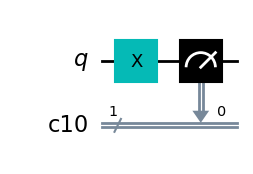

The measurements of the decoy photon at position 0 after the attack is: {'0': 48, '1': 976}


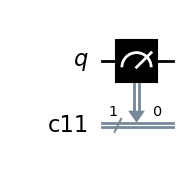

The measurements of the decoy photon at position 5 after the attack is: {'0': 1019, '1': 5}


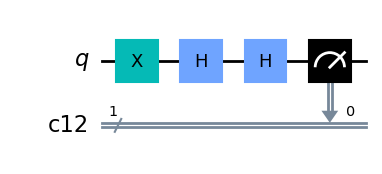

The measurements of the decoy photon at position 9 after the attack is: {'0': 50, '1': 974}


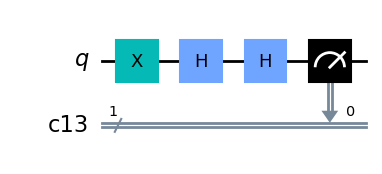

The measurements of the decoy photon at position 11 after the attack is: {'0': 58, '1': 966}


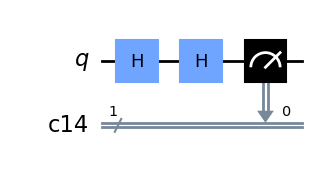

The measurements of the decoy photon at position 12 after the attack is: {'0': 1019, '1': 5}


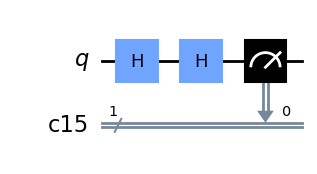

The measurements of the decoy photon at position 13 after the attack is: {'0': 1023, '1': 1}


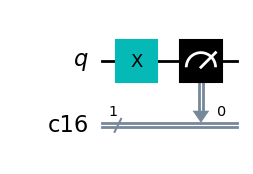

The measurements of the decoy photon at position 15 after the attack is: {'0': 49, '1': 975}


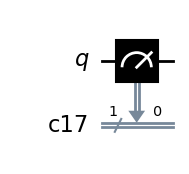

The measurements of the decoy photon at position 16 after the attack is: {'0': 1024}


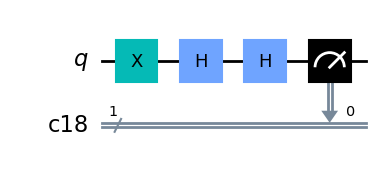

The measurements of the decoy photon at position 17 after the attack is: {'0': 48, '1': 976}


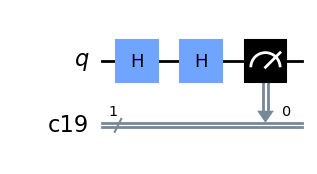

The measurements of the decoy photon at position 22 after the attack is: {'0': 1021, '1': 3}
Error rate in measuring decoy photons: 2.607421875 %
The number of mismatched decoy photons is 0 and the error rate of trasmitting decoy photons: 0.0 %
Time taken to measure 10 decoy photons: 0 hours 19 minutes 24.219533443450928 seconds

No Eavesdropper detected.


In [14]:
#Measuring the decoy photons inserted in sequence of travelling photons in respective bases and finiding the errors

errors_for_second_check0=[]
def check_eavesdropper2(pk,rdq_st2,errors_for_second_check,pos2):
    j=0
    err2=0
    err_rate2=0.0
    err_flag2=0
    err_count2=0
    err_count_rate2=0.0
    time02 = time.time()
    for i in pos2:
        flag=0
        pk[i].add_register(ClassicalRegister(1))
        if rdq_st2[j]=='+' or rdq_st2[j]=='-':
            pk[i].h(0)
            flag=1
        pk[i].measure(0,0)
        rslt2 = execute(pk[i], backend=chosen_backend, shots=shots).result()
        cc2 = rslt2.get_counts()
        m=list(cc2.keys())
        m.sort()
        display(pk[i].draw('mpl'))
        print("The measurements of the decoy photon at position",i,"after the attack is:",cc2)       
        err2,err_flag2=noisy_meas_err_func(cc2,rdq_st2,j,shots,flag)
        err_count2+=err_flag2
        j=j+1
        err_rate2=err_rate2+float((err2/shots)*100)
    time_2 = time.time() - time02
    hr2 = time_2//3600
    time_2 %= 3600
    err_rate2=float(err_rate2/nd)
    err_count_rate2=float((err_count2/nd)*100)
    errors_for_second_check.append(err_rate2)
    return err_count2,err_count_rate2,err_rate2,hr2,time_2

err_count2,err_count_rate2,err_rate2,hr2,time_2=check_eavesdropper2(private_key0,rdq_st20,errors_for_second_check0,pos20)
print(f"Error rate in measuring decoy photons: {err_rate2} %")
print(f"The number of mismatched decoy photons is {err_count2} and the error rate of trasmitting decoy photons: {err_count_rate2} %")
print(f'Time taken to measure {nd} decoy photons: {int(hr2)} hours {int(time_2//60)} minutes {time_2%60} seconds')
if err_count2!=0:
    print("\nEavesdropper detected.")
else:
    print("\nNo Eavesdropper detected.")

In [15]:
#Step 4: Decrypting the message using CNOT gate

def decrypt_mes(pk,m,pos2):
    for i in range(m):
        if i not in pos2:
            pk[i].cx(1,2)
            pk[i].barrier()
        
decrypt_mes(private_key0,n+nd,pos20)

In [16]:
def cal_error_and_res(fm,mssg,j):
    error=0
    wrong_mssg=0
    a=list(fm.keys())
    a.sort()
    res=-1
    if '0' in fm and '1' not in fm:
        res=0
    elif '1' in fm and '0' not in fm:
        res=1
    if '0' in fm and '1' in fm:
        if fm['0']>fm['1'] and abs(fm['0']-fm['1'])>600:
            res=0
        elif fm['0']<fm['1'] and abs(fm['0']-fm['1'])>600:
            res=1
        if int(a[0])==mssg[j]:
            error=fm['1']
        elif int(a[1])==mssg[j]:
            error=fm['0']
    if res!=mssg[j]:
        wrong_mssg=1
    return res,error,wrong_mssg

In [17]:
#Measuring the travelling qubit in Z basis

error_lst=[]
errors_in_mssg=[]
def measure_tq(pk,error_lst,errors_in_mssg,mssg,pos2):
    error=0
    error_rate=0.0
    error_in_mssg=0
    error_in_mssg_rate=0.0
    result2=[]
    time03 = time.time()
    j=0
    for i in range(n+nd):
        if i not in pos2:
            pk[i].measure(2,0)
            pk[i].barrier()
            result = execute(pk[i], backend=chosen_backend, shots=shots).result()
            noisy_counts=result.get_counts()
            #display(pk[i].draw('mpl'))
            print(noisy_counts)
            res,error,wrong_mssg=cal_error_and_res(noisy_counts,mssg,j)
            error_in_mssg+=wrong_mssg
            error_rate = error_rate + float((error/shots)*100)
            result2.append(res)
            j+=1
    time_3 = time.time() - time03
    hr3 = time_3//3600
    time_3 %= 3600
    error_in_mssg_rate=float((error_in_mssg/n)*100)
    error_rate = float(error_rate/n)
    error_lst.append(error_rate)
    errors_in_mssg.append(error_in_mssg_rate)
    print(f"The number of mismatched message photons is {error_in_mssg} and the amount of mismatched message photons:{error_in_mssg_rate} %")
    print(f"Error rate in measuring message photons: {error_rate} %")
    print(f'Time taken to measure {n} message photons: {int(hr3)} hours {int(time_3//60)} minutes {time_3%60} seconds')
    return result2

final_res=measure_tq(private_key0,error_lst,errors_in_mssg,message,pos20)     


{'0': 118, '1': 906}
{'0': 969, '1': 55}
{'0': 111, '1': 913}
{'0': 968, '1': 56}
{'0': 92, '1': 932}
{'0': 986, '1': 38}
{'0': 99, '1': 925}
{'0': 895, '1': 129}
{'0': 976, '1': 48}
{'0': 67, '1': 957}
{'0': 95, '1': 929}
{'0': 962, '1': 62}
{'0': 971, '1': 53}
{'0': 974, '1': 50}
{'0': 93, '1': 931}
The number of mismatched message photons is 0 and the amount of mismatched message photons:0.0 %
Error rate in measuring message photons: 7.591145833333333 %
Time taken to measure 15 message photons: 0 hours 1 minutes 46.87853264808655 seconds
